### https://yiyibooks.cn/xx/python_352/library/csv.html#module-csv

In [2]:
file=open('test.csv','a+')
#创建test.csv文件，以追加的读写模式
file.write('美国队长,钢铁侠,蜘蛛侠')
#写入test.csv文件
file.close()
#关闭文件

In [4]:
import openpyxl 
#引用openpyxl 。
wb = openpyxl.Workbook()
#利用openpyxl.Workbook()函数创建新的workbook（工作薄）对象，就是创建新的空的Excel文件。
sheet = wb.active
#wb.active就是获取这个工作薄的活动表，通常就是第一个工作表。
sheet.title = 'new title'
#可以用.title给工作表重命名。现在第一个工作表的名称就会由原来默认的“sheet1”改为"new title"。

In [5]:
sheet['A1'] = '漫威宇宙' 
#把'漫威宇宙'赋值给第一个工作表的A1单元格，就是往A1的单元格中写入了'漫威宇宙'。

In [6]:
row = ['美国队长','钢铁侠','蜘蛛侠']
#把我们想写入的一行内容写成列表，赋值给row。
sheet.append(row)
#用sheet.append()就能往表格里添加这一行文字。

In [7]:
rows = [['美国队长','钢铁侠','蜘蛛侠'],['是','漫威','宇宙', '经典','人物']]
#先把要写入的多行内容写成列表，再放进大列表里，赋值给rows。
for i in rows:
    sheet.append(i)
#遍历rows，同时把遍历的内容添加到表格里，这样就实现了多行写入。
print(rows)
#打印rows

[['美国队长', '钢铁侠', '蜘蛛侠'], ['是', '漫威', '宇宙', '经典', '人物']]


### 成功写入后，我们千万要记得保存这个Excel文件，不然就白写啦！

In [8]:
wb.save('Marvel.xlsx')
#保存新建的Excel文件，并命名为“Marvel.xlsx”

### 读取工作表的内容

In [9]:
wb = openpyxl.load_workbook('Marvel.xlsx')
sheet = wb['new title']
#先获取表
sheetname = wb.sheetnames
print(sheetname)
A1_cell = sheet['A1']
A1_value = A1_cell.value
print(A1_value)
#调用openpyxl.load_workbook()函数，打开“Marvel.xlsx”文件。
#获取“Marvel.xlsx”工作薄中名为“new title”的工作表。

['new title']
漫威宇宙


### https://openpyxl.readthedocs.io/en/stable/

In [13]:
import requests,openpyxl
wb=openpyxl.Workbook()  
#创建工作薄
sheet=wb.active 
#获取工作薄的活动表
sheet.title='restaurants' 
#工作表重命名

sheet['A1'] ='歌曲名'     #加表头，给A1单元格赋值
sheet['B1'] ='所属专辑'   #加表头，给B1单元格赋值
sheet['C1'] ='播放时长'   #加表头，给C1单元格赋值
sheet['D1'] ='播放链接'   #加表头，给D1单元格赋值

url = 'https://c.y.qq.com/soso/fcgi-bin/client_search_cp'
for x in range(5):
    params = {
        'ct': '24',
        'qqmusic_ver': '1298',
        'new_json': '1',
        'remoteplace': 'sizer.yqq.song_next',
        'searchid': '64405487069162918',
        't': '0',
        'aggr': '1',
        'cr': '1',
        'catZhida': '1',
        'lossless': '0',
        'flag_qc': '0',
        'p': str(x + 1),
        'n': '20',
        'w': '周杰伦',
        'g_tk': '5381',
        'loginUin': '0',
        'hostUin': '0',
        'format': 'json',
        'inCharset': 'utf8',
        'outCharset': 'utf-8',
        'notice': '0',
        'platform': 'yqq.json',
        'needNewCode': '0'
    }

    res_music = requests.get(url, params=params)
    json_music = res_music.json()
    list_music = json_music['data']['song']['list']
    for music in list_music:
        name = music['name']
        # 以name为键，查找歌曲名，把歌曲名赋值给name
        album = music['album']['name']
        # 查找专辑名，把专辑名赋给album
        time = music['interval']
        # 查找播放时长，把时长赋值给time
        link = 'https://y.qq.com/n/yqq/song/' + str(music['file']['media_mid']) + '.html\n\n'
        # 查找播放链接，把链接赋值给link
        sheet.append([name, album, time,url])
        # 把name、album、time和link写成列表，用append函数多行写入Excel
        print('歌曲名：' + name + '\n' + '所属专辑:' + album +'\n' + '播放时长:' + str(time) + '\n' + '播放链接:'+ url)
        
wb.save('Jay.xlsx')            
#最后保存并命名这个Excel文件



#调用openpyxl.load_workbook()函数，打开“Marvel.xlsx”文件。
#获取“Marvel.xlsx”工作薄中名为“new title”的工作表。

歌曲名：告白气球
所属专辑:周杰伦的床边故事
播放时长:215
播放链接:https://c.y.qq.com/soso/fcgi-bin/client_search_cp
歌曲名：晴天
所属专辑:叶惠美
播放时长:269
播放链接:https://c.y.qq.com/soso/fcgi-bin/client_search_cp
歌曲名：不能说的秘密
所属专辑:不能说的秘密 电影原声带
播放时长:296
播放链接:https://c.y.qq.com/soso/fcgi-bin/client_search_cp
歌曲名：稻香
所属专辑:魔杰座
播放时长:223
播放链接:https://c.y.qq.com/soso/fcgi-bin/client_search_cp
歌曲名：等你下课(with 杨瑞代)
所属专辑:等你下课
播放时长:270
播放链接:https://c.y.qq.com/soso/fcgi-bin/client_search_cp
歌曲名：七里香
所属专辑:七里香
播放时长:299
播放链接:https://c.y.qq.com/soso/fcgi-bin/client_search_cp
歌曲名：一路向北
所属专辑:J III MP3 Player
播放时长:295
播放链接:https://c.y.qq.com/soso/fcgi-bin/client_search_cp
歌曲名：搁浅
所属专辑:七里香
播放时长:240
播放链接:https://c.y.qq.com/soso/fcgi-bin/client_search_cp
歌曲名：青花瓷
所属专辑:我很忙
播放时长:239
播放链接:https://c.y.qq.com/soso/fcgi-bin/client_search_cp
歌曲名：夜曲
所属专辑:十一月的萧邦
播放时长:226
播放链接:https://c.y.qq.com/soso/fcgi-bin/client_search_cp
歌曲名：简单爱
所属专辑:范特西
播放时长:271
播放链接:https://c.y.qq.com/soso/fcgi-bin/client_search_cp
歌曲名：给我一首歌的时间
所属专辑:魔杰座
播放时长:253
播放链接:https://c.y.qq.com/soso/fcgi-b

In [19]:
wb = openpyxl.load_workbook('Jay.xlsx')
sheet = wb['restaurants']
#先获取表
sheetname = wb.sheetnames
print(sheetname)
en_words = ['A','B','C','D']
with open('Jay_read_test.txt','a') as fb:
    for i in range(1,101):
        for en_word in en_words:
            cell = sheet['%s%d'%(en_word,i)]
            value = cell.value
            print(value)
            fb.write(str(value))
            fb.write('\n')
#print(sheet)
#print(type(sheet))
#A1_value = A1_cell.value
#print(A1_value)

['restaurants']
歌曲名
所属专辑
播放时长
播放链接
告白气球
周杰伦的床边故事
215
https://c.y.qq.com/soso/fcgi-bin/client_search_cp
晴天
叶惠美
269
https://c.y.qq.com/soso/fcgi-bin/client_search_cp
不能说的秘密
不能说的秘密 电影原声带
296
https://c.y.qq.com/soso/fcgi-bin/client_search_cp
稻香
魔杰座
223
https://c.y.qq.com/soso/fcgi-bin/client_search_cp
等你下课(with 杨瑞代)
等你下课
270
https://c.y.qq.com/soso/fcgi-bin/client_search_cp
七里香
七里香
299
https://c.y.qq.com/soso/fcgi-bin/client_search_cp
一路向北
J III MP3 Player
295
https://c.y.qq.com/soso/fcgi-bin/client_search_cp
搁浅
七里香
240
https://c.y.qq.com/soso/fcgi-bin/client_search_cp
青花瓷
我很忙
239
https://c.y.qq.com/soso/fcgi-bin/client_search_cp
夜曲
十一月的萧邦
226
https://c.y.qq.com/soso/fcgi-bin/client_search_cp
简单爱
范特西
271
https://c.y.qq.com/soso/fcgi-bin/client_search_cp
给我一首歌的时间
魔杰座
253
https://c.y.qq.com/soso/fcgi-bin/client_search_cp
蒲公英的约定
我很忙
247
https://c.y.qq.com/soso/fcgi-bin/client_search_cp
安静
范特西
334
https://c.y.qq.com/soso/fcgi-bin/client_search_cp
彩虹
我很忙
263
https://c.y.qq.com/soso/fcgi-bin/cli

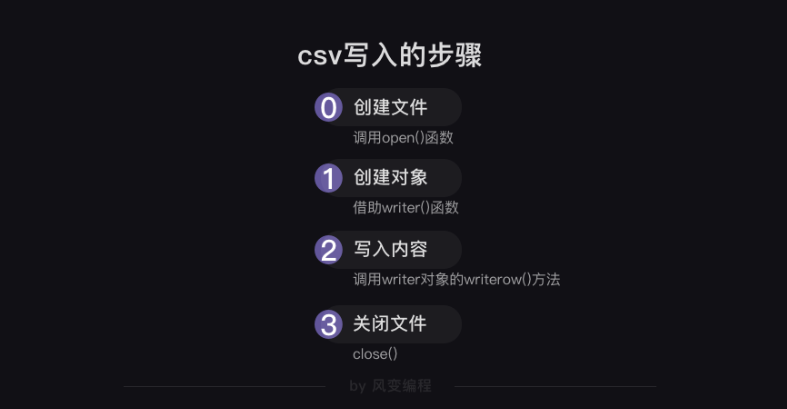

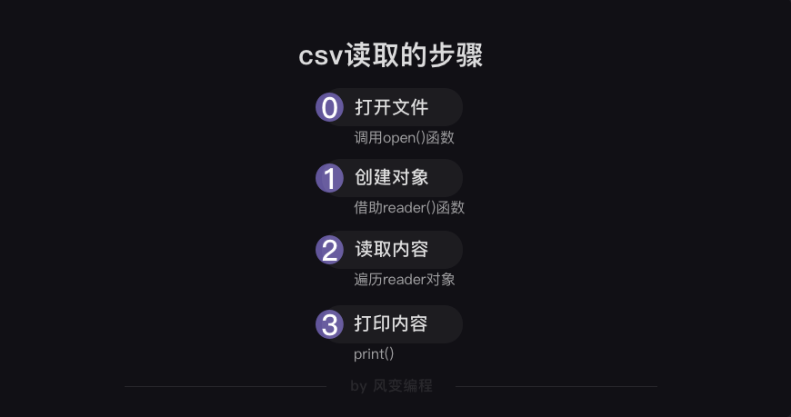

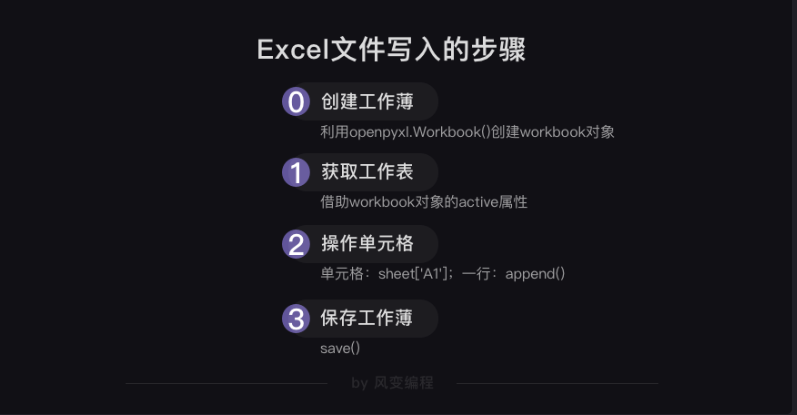

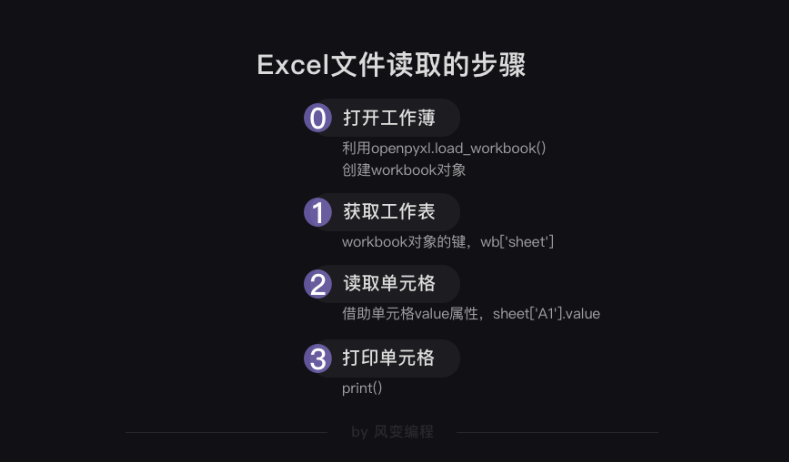

In [14]:
import requests # 调用requests库
from bs4 import BeautifulSoup # 调用BeautifulSoup库
#from Analysis import *
import csv
wb=openpyxl.Workbook()  
#创建工作薄
sheet=wb.active 
#获取工作薄的活动表
sheet.title='Douban_Film' 
#工作表重命名

sheet['A1'] ='序号'     #加表头，给A1单元格赋值
sheet['B1'] ='电影名称'   #加表头，给B1单元格赋值
sheet['C1'] ='评分'   #加表头，给C1单元格赋值
sheet['D1'] ='推荐语'   #加表头，给D1单元格赋值
sheet['E1'] ='链接'   #加表头，给D1单元格赋值
def csv_output(file_name,list_data,col_name=''):
    with open(file_name,'w', newline = '',encoding = 'gb18030') as csvfile:
        writer=csv.writer(csvfile,dialect='excel')
        if col_name:
            writer.writerow([col_name[0],col_name[1],col_name[2],col_name[3],col_name[4]])
        for value in list_data:
            writer.writerow([value[0],value[1],value[2],value[3],value[4]])
list= []
for x in range(10):
    url = 'https://movie.douban.com/top250?start=' + str(x*25) + '&filter='
    res = requests.get(url)
    bs = BeautifulSoup(res.text, 'html.parser')
    bs = bs.find('ol', class_="grid_view")#找取当前页面的唯一标签
    
    for titles in bs.find_all('li'):   #找去每个内容共同的父标签
        num = titles.find('em',class_="").text
        #查找序号
        title = titles.find('span', class_="title").text #以前经常犯的一个错误就是在一个父标签里寻找子标签的属性
        #查找电影名
        comment = titles.find('span',class_="rating_num").text
        try:
            tes = titles.find('span',class_="inq").text
            #查找推荐语
        except AttributeError:
            tes='暂时没有推荐语'
        #查找评分
        url_movie = titles.find('a')['href']
        #list.append([num,title,comment,tes,url_movie])
        sheet.append([num, title,comment,tes,url_movie])
        print(num + '.' + title + '——' + comment + '\n' + '推荐语：' + tes +'\n' + url_movie)
        
        
        
wb.save('Douban_top250.xlsx')            
#最后保存并命名这个Excel文件     
        


1.肖申克的救赎——9.6
推荐语：希望让人自由。
https://movie.douban.com/subject/1292052/
2.霸王别姬——9.6
推荐语：风华绝代。
https://movie.douban.com/subject/1291546/
3.这个杀手不太冷——9.4
推荐语：怪蜀黍和小萝莉不得不说的故事。
https://movie.douban.com/subject/1295644/
4.阿甘正传——9.4
推荐语：一部美国近现代史。
https://movie.douban.com/subject/1292720/
5.美丽人生——9.5
推荐语：最美的谎言。
https://movie.douban.com/subject/1292063/
6.泰坦尼克号——9.3
推荐语：失去的才是永恒的。 
https://movie.douban.com/subject/1292722/
7.千与千寻——9.3
推荐语：最好的宫崎骏，最好的久石让。 
https://movie.douban.com/subject/1291561/
8.辛德勒的名单——9.5
推荐语：拯救一个人，就是拯救整个世界。
https://movie.douban.com/subject/1295124/
9.盗梦空间——9.3
推荐语：诺兰给了我们一场无法盗取的梦。
https://movie.douban.com/subject/3541415/
10.机器人总动员——9.3
推荐语：小瓦力，大人生。
https://movie.douban.com/subject/2131459/
11.忠犬八公的故事——9.3
推荐语：永远都不能忘记你所爱的人。
https://movie.douban.com/subject/3011091/
12.三傻大闹宝莱坞——9.2
推荐语：英俊版憨豆，高情商版谢耳朵。
https://movie.douban.com/subject/3793023/
13.海上钢琴师——9.2
推荐语：每个人都要走一条自己坚定了的路，就算是粉身碎骨。 
https://movie.douban.com/subject/1292001/
14.放牛班的春天——9.3
推荐语：天籁一般的童声，是最接近上帝的存在。 
https://movie.do

126.七武士——9.2
推荐语：时代悲歌。
https://movie.douban.com/subject/1295399/
127.岁月神偷——8.6
推荐语：岁月流逝，来日可追。
https://movie.douban.com/subject/3792799/
128.怪兽电力公司——8.6
推荐语：不要给它起名字，起了名字就有感情了。
https://movie.douban.com/subject/1291579/
129.7号房的礼物——8.8
推荐语：《我是山姆》的《美丽人生》。
https://movie.douban.com/subject/10777687/
130.真爱至上——8.5
推荐语：爱，是个动词。
https://movie.douban.com/subject/1292401/
131.电锯惊魂——8.7
推荐语：真相就在眼前。
https://movie.douban.com/subject/1417598/
132.谍影重重3——8.7
推荐语：像吃了苏打饼一样干脆的电影。
https://movie.douban.com/subject/1578507/
133.萤火虫之墓——8.7
推荐语：幸福是生生不息，却难以触及的远。 
https://movie.douban.com/subject/1293318/
134.萤火之森——8.8
推荐语：触不到的恋人。
https://movie.douban.com/subject/5989818/
135.疯狂原始人——8.7
推荐语：老少皆宜，这就是好莱坞动画的魅力。
https://movie.douban.com/subject/1907966/
136.东邪西毒——8.6
推荐语：电影诗。
https://movie.douban.com/subject/1292328/
137.超能陆战队——8.6
推荐语：Balalala~~~
https://movie.douban.com/subject/11026735/
138.喜宴——8.8
推荐语：中国家庭的喜怒哀乐忍。
https://movie.douban.com/subject/1303037/
139.唐伯虎点秋香——8.5
推荐语：华太师是黄霑，吴镇宇四大才子之一。
https://movie.douban